# Explorative Analysis of:
# "USA Local Development Corporations Loans" Dataset

## By (Essam Ali)

## Introduction:
- Public authorities are required by Section 2800 of Public Authorities Law to submit annual reports to the Authorities Budget Office that include loans data. Local development corporations are required to report information on the projects they support and how those approved projects are financed (either through grants, loans, or bonds). The dataset consists of loans data reported by Local Development Corporations beginning with fiscal years ending in 2011.

### About The Dataset:
- This dataset contains 13,513 loans with 18 variables (columns) on each loan (rows), including loan amount, borrower rate (or interest rate), original loan amount, loan term completed, and many others.

In [1]:

import os, types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_8a0010e5e78244ce83863cd9c255c89a = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_8a0010e5e78244ce83863cd9c255c89a = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_8a0010e5e78244ce83863cd9c255c89a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cBJDMUX4Q3tNm_3tQKTwpTJNXqQFmqQtFwGuDtTTcPFG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_8a0010e5e78244ce83863cd9c255c89a)

body = client_8a0010e5e78244ce83863cd9c255c89a.get_object(Bucket='analyzingcorploans-donotdelete-pr-xxw2enfwhic61c',Key='corp_loans_org1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Authority Name,Fiscal Year End Date,Loans,Loan Fund Sources,Recipient Name,Recipient City,Recipient State,Recipient Postal Code,Date Loan Awarded,Original Loan Amount,Interest Rate,Loan Length,Amount Repaid,Loan Purpose,New Jobs,Jobs Planned,Jobs Created,Loan Terms Completed
0,Columbia County Capital Resource Corporation,12/31/2011,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monroe County Sports Development Corporation,12/31/2011,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Riverhead IDA Economic Job Development Corpora...,12/31/2011,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Greene Tobacco Asset Securitization Corporation,12/31/2011,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hudson Yards Development Corporation,06/30/2014,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(13513, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13513 entries, 0 to 13512
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Authority Name         13513 non-null  object 
 1   Fiscal Year End Date   13513 non-null  object 
 2   Loans                  1540 non-null   object 
 3   Loan Fund Sources      11973 non-null  object 
 4   Recipient Name         11973 non-null  object 
 5   Recipient City         11973 non-null  object 
 6   Recipient State        11972 non-null  object 
 7   Recipient Postal Code  11973 non-null  object 
 8   Date Loan Awarded      11973 non-null  object 
 9   Original Loan Amount   11973 non-null  float64
 10  Interest Rate          11973 non-null  float64
 11  Loan Length            11973 non-null  float64
 12  Amount Repaid          11973 non-null  float64
 13  Loan Purpose           11973 non-null  object 
 14  New Jobs               11973 non-null  object 
 15  Jo

In [4]:
df.describe()

,Original Loan Amount,Interest Rate,Loan Length,Amount Repaid,Jobs Planned,Jobs Created
count,1.197300e+04,11973.000000,11973.000000,1.197300e+04,5711.000000,5685.000000
mean,2.300714e+05,3.965843,9.435146,7.776631e+04,11.099107,9.512401
std,7.622282e+05,1.897435,7.404120,3.069333e+05,59.016317,25.637256
min,5.500000e+02,0.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,3.000000e+04,3.000000,5.000000,5.351190e+03,2.000000,0.000000
50%,7.500000e+04,4.000000,7.000000,2.000000e+04,4.000000,2.000000
75%,2.000000e+05,5.000000,10.000000,5.984939e+04,10.000000,8.000000
max,1.988372e+07,10.250000,120.000000,1.305000e+07,3000.000000,457.000000


In [5]:
df.Loans.value_counts()

No    1540
Name: Loans, dtype: int64

- We notice that all rows of 'Loans' column that with "No", is Null.
- So, we can drop these rows, and then drop the column 'Loans' itself.

In [6]:
df["Recipient State"].value_counts()

NY    11902
PA       22
NJ       14
FL        8
NC        7
KY        6
MO        5
ME        4
AZ        2
VT        1
OH        1
Name: Recipient State, dtype: int64

- We need to know how many loan terms completed, and then determine how many borrowers whose term ended but they did not repaid the loan.

In [7]:
df["Loan Terms Completed"].value_counts()

No     10110
Yes     1863
Name: Loan Terms Completed, dtype: int64

In [61]:
df["Interest Rate"].value_counts()

4.00    2714
5.00    2088
3.00    1267
0.00     897
6.00     522
        ... 
6.76       1
5.17       1
5.06       1
4.60       1
6.40       1
Name: Interest Rate, Length: 137, dtype: int64

### The structure of your dataset:

The dataset contains data about the details of the various loans taken by The Local development corporations (Borrowers) from The Public authorities.
Each row in the dataset represents a loan, which is described by various attributes about the Borrower such as Original Loan Amount, Loan Purpose, and Amount Repaid. It also describes other parameters such as Loan Terms Completed, Interest Rate, etc.

### The main features of interest in this dataset:

I'm interested in figuring out what features are best for **Predicting the Risk** for each loan.
 

### The features in the dataset I think will help support my investigation into my features of interest:

The following are the important features that I'll use in this exploration:
1. Authority Name.
2. Loan Fund Sources
3. Original Loan Amount
4. Interest Rate
5. Loan Length
6. Amount Repaid
7. Loan Purpose
8. Loan Terms Completed
9. Jobs Planned
10. Jobs Created


# 

# Data Cleaning:

### 1. Dropping the empty rows which does not contain loan data.

In [8]:
df.drop(df[df.Loans == "No"].index, inplace=True)

### 2. Now, the column 'Loans' contains no data. We can drop it.

In [9]:
df.drop('Loans', axis=1, inplace=True)
df.head()

,Authority Name,Fiscal Year End Date,Loan Fund Sources,Recipient Name,Recipient City,Recipient State,Recipient Postal Code,Date Loan Awarded,Original Loan Amount,Interest Rate,Loan Length,Amount Repaid,Loan Purpose,New Jobs,Jobs Planned,Jobs Created,Loan Terms Completed
11,Watertown Industrial Center Local Development ...,06/30/2011,Federal,Ferguson Waterworks,WATERTOWN,NY,13601,04/17/2007,100000.00,3.0,5.0,61741.85,Commercial Property Construction/Acquisition/R...,No,NaN,NaN,No
12,Watertown Industrial Center Local Development ...,06/30/2011,Federal,Ferguson Waterworks,WATERTOWN,NY,13601,02/17/2009,25179.75,3.0,5.0,25179.75,Commercial Property Construction/Acquisition/R...,No,NaN,NaN,Yes
13,Watertown Industrial Center Local Development ...,06/30/2011,Federal,Jefferson County Job Development Corporation,WATERTOWN,NY,13601,09/21/2004,81000.00,3.0,5.0,81000.00,Commercial Property Construction/Acquisition/R...,No,NaN,NaN,Yes
14,Watertown Industrial Center Local Development ...,06/30/2011,Federal,ServPro of Jefferson County,WATERTOWN,NY,13601,06/24/2008,58457.00,3.0,10.0,15840.62,Commercial Property Construction/Acquisition/R...,No,NaN,NaN,No
21,Potsdam Community Development Corporation,05/31/2011,Municipal,St. Lawrnce Chocolates,POTSDAM,NY,13676,11/10/2010,35000.00,5.0,7.0,3918.40,Business Expansion/Startup,Yes,1.0,1.0,Yes


### 3. No need for the columns 'Recipient City' and 'Recipient Postal Code'. We can merge them in one column called ''

In [10]:
df["Address"] = df["Recipient City"] + "-" + df["Recipient Postal Code"]

### 4. Determining the borrowers did not repaid thier loans.
i.e their 'Amount Repaid' is less than the 'Original Loan Amount' and loan term completed.
I'll add a column 'Risk' and divide borrowers into whose with 'No Risk' and the others with 'Risk'

In [11]:
conditions = [
    (df['Loan Terms Completed'] == "Yes") & (df['Amount Repaid'] < df['Original Loan Amount']),
    (df['Loan Terms Completed'] == "Yes") & (df['Amount Repaid'] >= df['Original Loan Amount']),
    (df['Loan Terms Completed'] == "No")
    ]

values = ['Risk', 'No Risk', 'No Risk']

df['Risk'] = np.select(conditions, values)

df.head()

,Authority Name,Fiscal Year End Date,Loan Fund Sources,Recipient Name,Recipient City,Recipient State,Recipient Postal Code,Date Loan Awarded,Original Loan Amount,Interest Rate,Loan Length,Amount Repaid,Loan Purpose,New Jobs,Jobs Planned,Jobs Created,Loan Terms Completed,Address,Risk
11,Watertown Industrial Center Local Development ...,06/30/2011,Federal,Ferguson Waterworks,WATERTOWN,NY,13601,04/17/2007,100000.00,3.0,5.0,61741.85,Commercial Property Construction/Acquisition/R...,No,NaN,NaN,No,WATERTOWN-13601,No Risk
12,Watertown Industrial Center Local Development ...,06/30/2011,Federal,Ferguson Waterworks,WATERTOWN,NY,13601,02/17/2009,25179.75,3.0,5.0,25179.75,Commercial Property Construction/Acquisition/R...,No,NaN,NaN,Yes,WATERTOWN-13601,No Risk
13,Watertown Industrial Center Local Development ...,06/30/2011,Federal,Jefferson County Job Development Corporation,WATERTOWN,NY,13601,09/21/2004,81000.00,3.0,5.0,81000.00,Commercial Property Construction/Acquisition/R...,No,NaN,NaN,Yes,WATERTOWN-13601,No Risk
14,Watertown Industrial Center Local Development ...,06/30/2011,Federal,ServPro of Jefferson County,WATERTOWN,NY,13601,06/24/2008,58457.00,3.0,10.0,15840.62,Commercial Property Construction/Acquisition/R...,No,NaN,NaN,No,WATERTOWN-13601,No Risk
21,Potsdam Community Development Corporation,05/31/2011,Municipal,St. Lawrnce Chocolates,POTSDAM,NY,13676,11/10/2010,35000.00,5.0,7.0,3918.40,Business Expansion/Startup,Yes,1.0,1.0,Yes,POTSDAM-13676,Risk


### 5. The Loan Length is by Years. So, we can convert its datatype into integer.

In [12]:
df['Loan Length'] = df['Loan Length'].astype('int64')

In [13]:
df['Loan Length'].value_counts()

5      3912
10     2089
15     1713
7      1513
20      637
6       447
3       280
1       274
30      231
4       208
2       132
8       111
12       67
9        36
25       33
60       32
11       29
13       29
18       24
16       24
22       19
17       17
35       14
23       12
26       12
32       11
100       9
14        9
99        8
19        8
43        5
42        5
41        5
33        5
24        5
27        3
28        2
21        1
120       1
96        1
Name: Loan Length, dtype: int64

### 6. Detecting the columns with missing values to fill them:

In [14]:
df.isnull().sum()

Authority Name              0
Fiscal Year End Date        0
Loan Fund Sources           0
Recipient Name              0
Recipient City              0
Recipient State             1
Recipient Postal Code       0
Date Loan Awarded           0
Original Loan Amount        0
Interest Rate               0
Loan Length                 0
Amount Repaid               0
Loan Purpose                0
New Jobs                    0
Jobs Planned             6262
Jobs Created             6288
Loan Terms Completed        0
Address                     0
Risk                        0
dtype: int64

### 7. Filling missing values in 'Jobs Planned' and 'Jobs Created' with '0.0'

In [15]:
df["Jobs Planned"].fillna((0.0), inplace = True)

In [16]:
df["Jobs Created"].fillna((0.0), inplace = True)

In [17]:
df["Recipient State"].fillna(('Unknown'), inplace = True)

In [18]:
df.isnull().sum()

Authority Name           0
Fiscal Year End Date     0
Loan Fund Sources        0
Recipient Name           0
Recipient City           0
Recipient State          0
Recipient Postal Code    0
Date Loan Awarded        0
Original Loan Amount     0
Interest Rate            0
Loan Length              0
Amount Repaid            0
Loan Purpose             0
New Jobs                 0
Jobs Planned             0
Jobs Created             0
Loan Terms Completed     0
Address                  0
Risk                     0
dtype: int64

### Now, no missimg data

### 8. Converting'Fiscal Year End Date' and 'Date Loan Awarded' from String to Date:

In [19]:
df['Fiscal Year End Date'] = df['Fiscal Year End Date'].astype('datetime64')

In [20]:
df['Date Loan Awarded'] = df['Date Loan Awarded'].astype('datetime64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11973 entries, 11 to 13512
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Authority Name         11973 non-null  object        
 1   Fiscal Year End Date   11973 non-null  datetime64[ns]
 2   Loan Fund Sources      11973 non-null  object        
 3   Recipient Name         11973 non-null  object        
 4   Recipient City         11973 non-null  object        
 5   Recipient State        11973 non-null  object        
 6   Recipient Postal Code  11973 non-null  object        
 7   Date Loan Awarded      11973 non-null  datetime64[ns]
 8   Original Loan Amount   11973 non-null  float64       
 9   Interest Rate          11973 non-null  float64       
 10  Loan Length            11973 non-null  int64         
 11  Amount Repaid          11973 non-null  float64       
 12  Loan Purpose           11973 non-null  object        
 13  

### Now, We Have a Clean Data!

- Saving the cleaned data as a new cssv file for future use.

In [22]:
# df.to_csv('corp_loans_org1_cleaned.csv')

# 

## Distribution of the main Features of interest:

### Distribution of Loan Fund Sources:

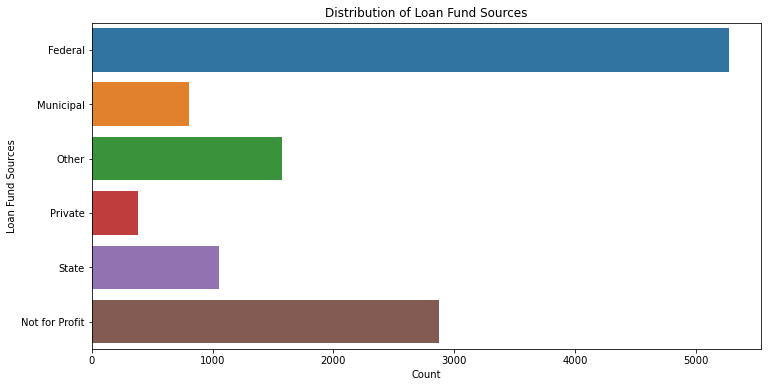

In [23]:
fig = plt.figure(figsize=(12,6))
sb.countplot(y='Loan Fund Sources', data=df)
plt.title('Distribution of Loan Fund Sources')
plt.ylabel('Loan Fund Sources')
plt.xlabel('Count')
plt.show()

- The most loan authorities are the Federal and the Not Profit ones.

### Distribution of Recipient State:

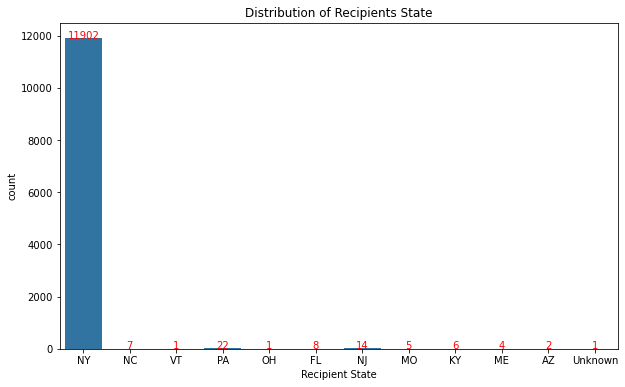

In [24]:
colorChoice = sb.color_palette()[0]

plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'Recipient State', color = colorChoice);
plt.title('Distribution of Recipients State');

locs, labels = plt.xticks()
rec_counts = df['Recipient State'].value_counts()

for loc, label in zip(locs, labels):
    count = rec_counts[(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'red')

- Most of Recipients are from New York State.

### What Are The Most Common purposes of Taking Loans?

- We need to shorten the purpose string first.

In [25]:
df['Loan Purpose'] = df['Loan Purpose'].str[:25]

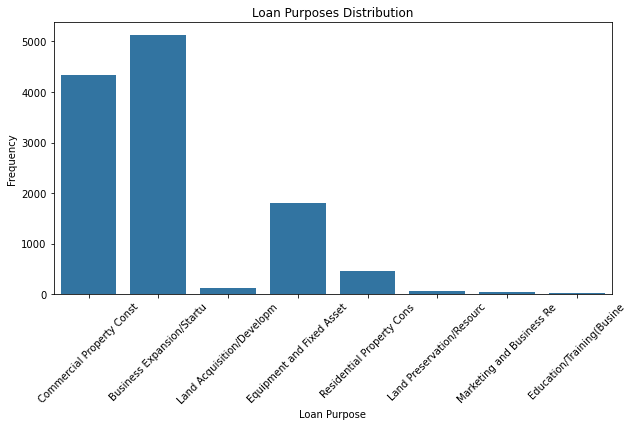

In [26]:
plt.figure(figsize=[10, 5]);
sb.countplot(data = df, x = 'Loan Purpose', color = colorChoice);
plt.title('Loan Purposes Distribution');
plt.ylabel('Frequency');
plt.xlabel('Loan Purpose');
plt.xticks(rotation=45);

- We can notice that the most Common purposes of Taking Loans are:
1. Commercial Property Construction/Acquisition/Revitalization/Improvement.
2. Business Expansion/Startup
3. Equipment and Fixed Asset Acquisition

### Distribution of Loan Terms Completion Status:

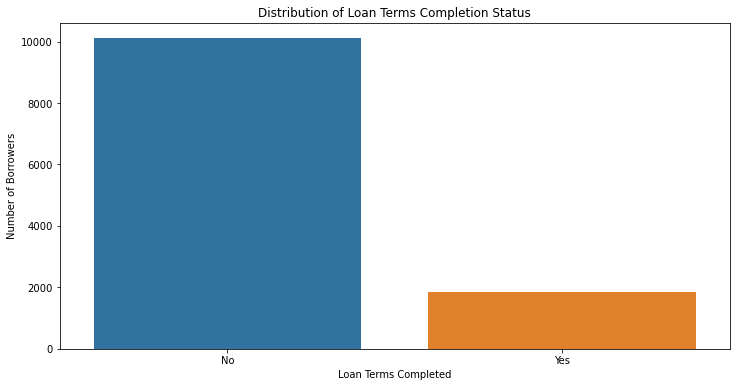

In [27]:
fig = plt.figure(figsize=(12,6))
sb.countplot(x='Loan Terms Completed', data=df)
plt.title('Distribution of Loan Terms Completion Status')
plt.ylabel('Number of Borrowers')
plt.show()

### How Many Borrowers Didn't Repaid Their Loans?

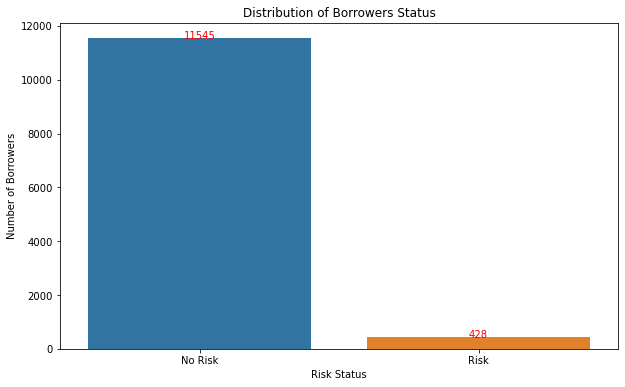

In [28]:
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'Risk');
plt.title('Distribution of Borrowers Status');
plt.xlabel('Risk Status')
plt.ylabel('Number of Borrowers')

locs, labels = plt.xticks()
rec_counts = df['Risk'].value_counts()

for loc, label in zip(locs, labels):
    count = rec_counts[(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'red')

- The Borowers didn't repaid thier loan are about 3.6% of the total recipients.

### Distribution of Original Loan Amount:

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


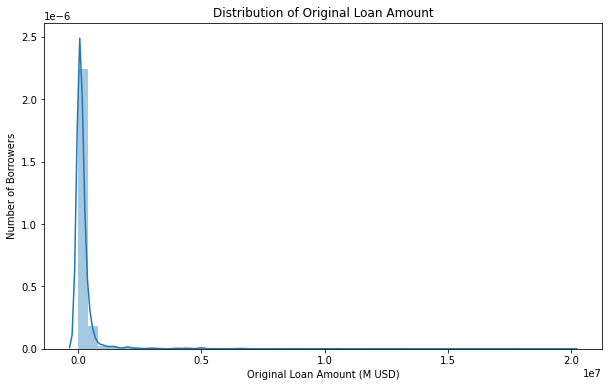

In [29]:
fig = plt.figure(figsize=(10,6))
sb.distplot(df['Original Loan Amount'], bins = 50)
plt.title('Distribution of Original Loan Amount')
plt.xlabel('Original Loan Amount (M USD)')
plt.ylabel('Number of Borrowers')
plt.show()

- There are outlier values

In [30]:
# Remove loans greater than 1M.
df_amount1 = df[df['Original Loan Amount'] < 1000000]

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


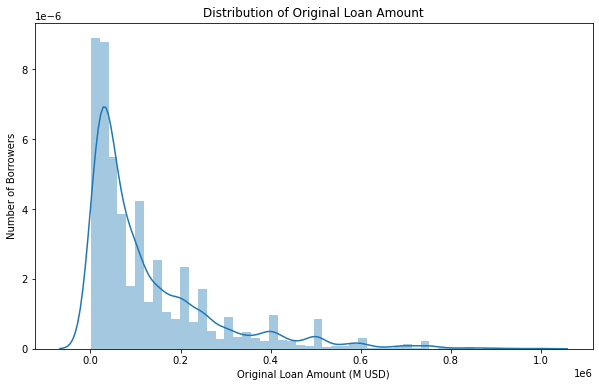

In [31]:
fig = plt.figure(figsize=(10,6))
sb.distplot(df_amount1['Original Loan Amount'], bins = 50)
plt.title('Distribution of Original Loan Amount')
plt.xlabel('Original Loan Amount (M USD)')
plt.ylabel('Number of Borrowers')
plt.show()

- The Distribution of Original Loan Amount is strongly Right Skewd, with outlier values.

### Distribution of Interest Rate:

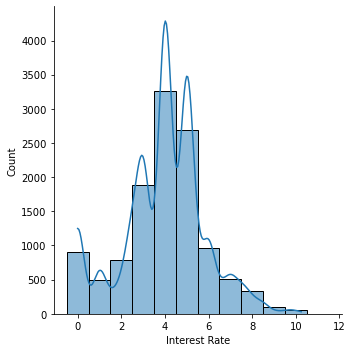

In [32]:
sb.displot(df['Interest Rate'], discrete = True, kde = True)
plt.show()

In [69]:
df['Interest Rate'].describe()

count    11973.000000
mean         3.965843
std          1.897435
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.250000
Name: Interest Rate, dtype: float64

- The Interest Rate is almost normally distributed with mean/med=3.96/4.0.
- There are also spikes at higher interest rates at the low values (Less than 1).

### Distribution of Loan Length:

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


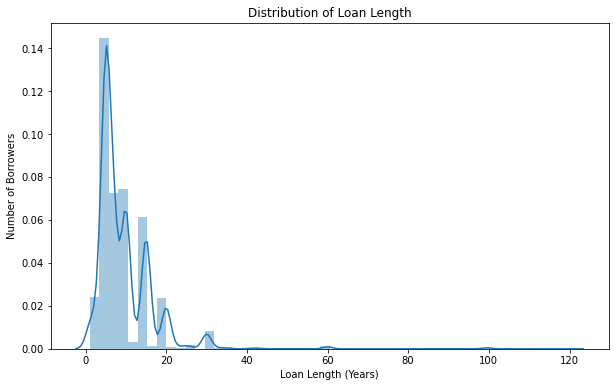

In [33]:
fig = plt.figure(figsize=(10,6))
sb.distplot(df['Loan Length'], bins = 50)
plt.title('Distribution of Loan Length')
plt.xlabel('Loan Length (Years)')
plt.ylabel('Number of Borrowers')
plt.show()

- There are outlier values

In [34]:
# Remove loans greater than 60 Years.
df_length1 = df[df['Loan Length'] < 60]

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


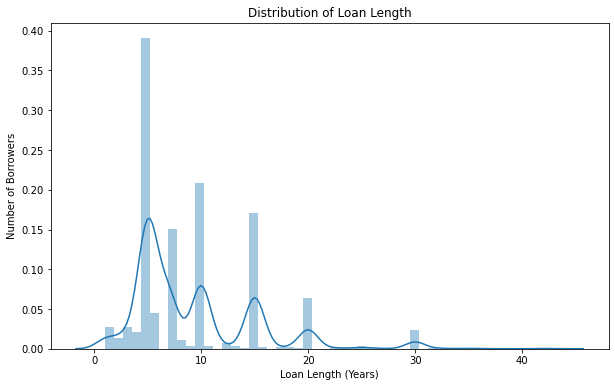

In [35]:
fig = plt.figure(figsize=(10,6))
sb.distplot(df_length1['Loan Length'], bins = 50)
plt.title('Distribution of Loan Length')
plt.xlabel('Loan Length (Years)')
plt.ylabel('Number of Borrowers')
plt.show()

- Most of the loans in the dataset have a length below 60 years.

## Observations About The Dataset Features: 
- I selected the features whitch will help me Predicting the Risk for each loan.
- Most of features distributions were normal, except 'Original Loan Amount' and 'Loan Length' which have outlier values.

## Bivariate Exploration

- In this section, I'll investigate relationships between pairs of variables in my
data from the variables discussed in the previous section.

### Does the Interest Rate Affected By The Original Loan Amount?

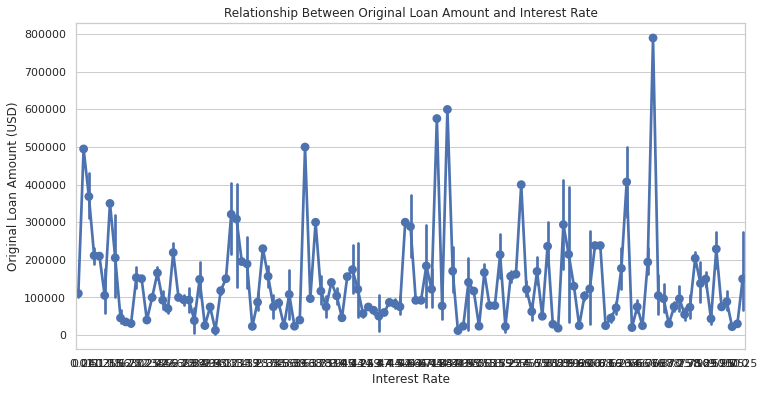

In [68]:
fig = plt.figure(figsize=(12,6))
sb.pointplot(x='Interest Rate', y='Original Loan Amount', data=df_amount1)
plt.title('Relationship Between Original Loan Amount and Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Original Loan Amount (USD)')
plt.show()

- We can notice that the Interest Rate Affected By The Original Loan Amount.
- The higher Original Loan Amount leads to higher Interest Rate.

### Does the Original Loan Amount Related to the Loan Purpose?

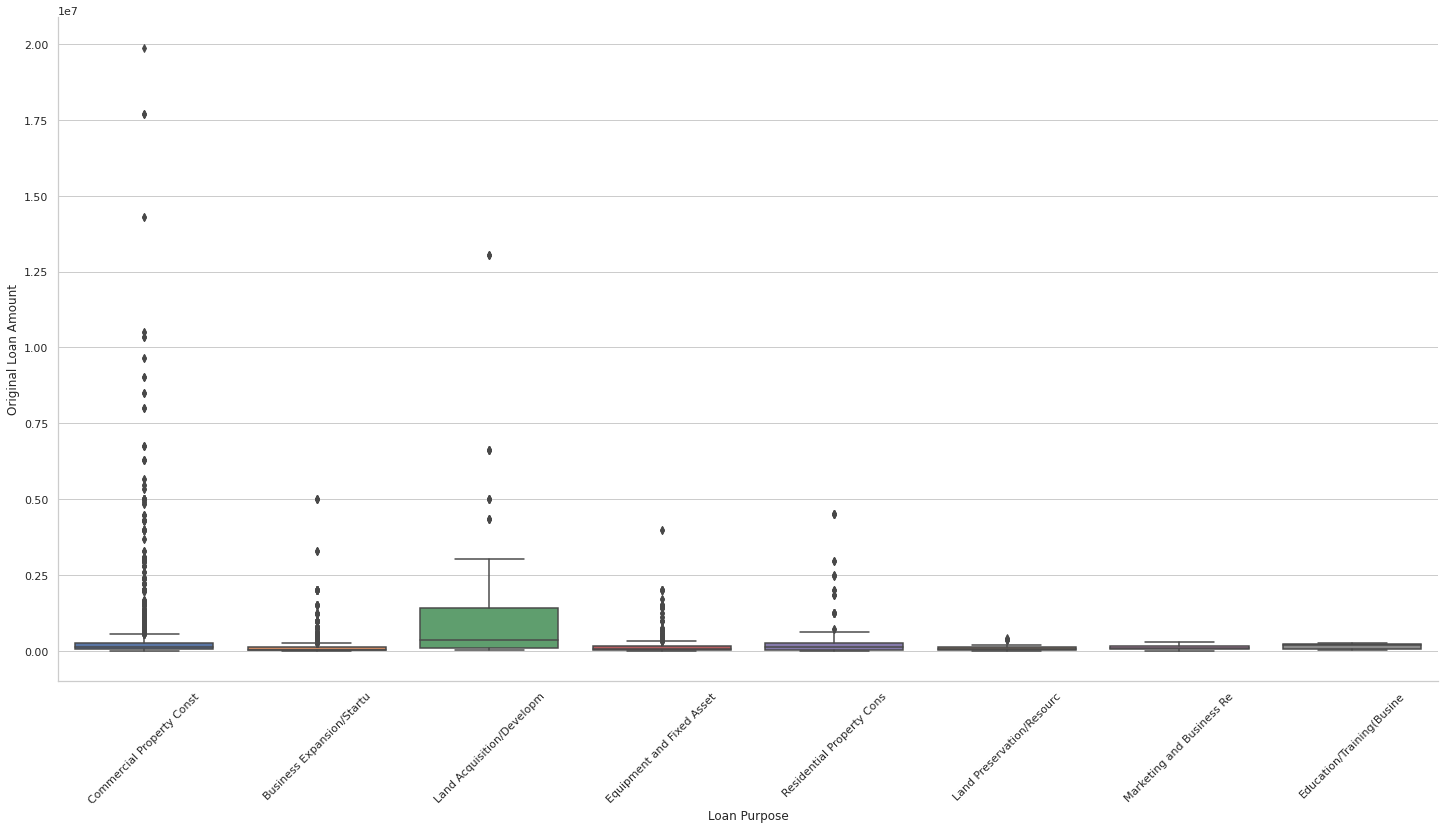

In [36]:
sb.set(style="whitegrid")
sb.catplot(x='Loan Purpose', y='Original Loan Amount', kind='box', data=df, height=10, aspect=2);
plt.xticks(rotation=45);

- After removing the outlier values:

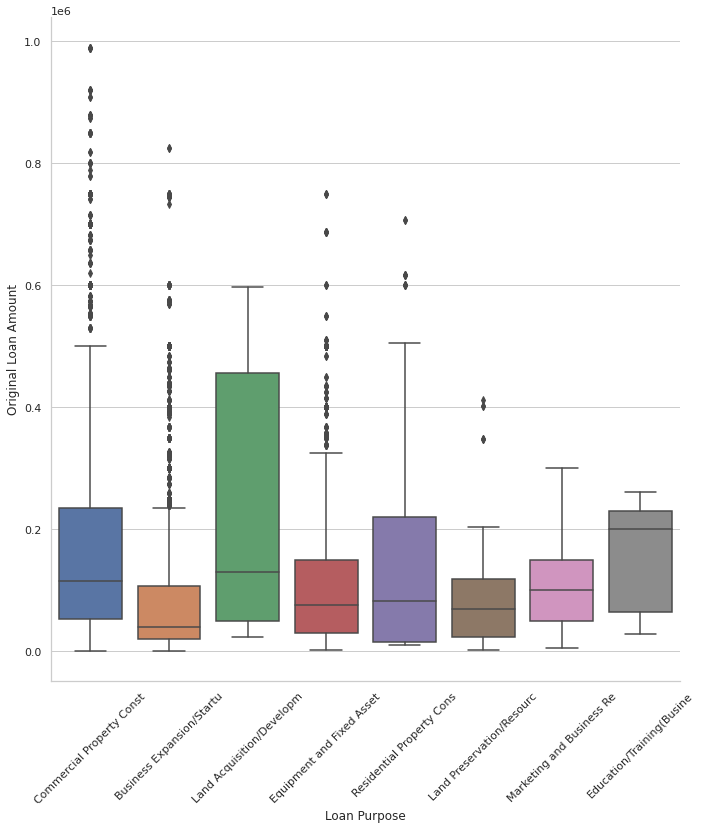

In [37]:
sb.set(style="whitegrid")
sb.catplot(x='Loan Purpose', y='Original Loan Amount', kind='box', data=df_amount1, height=10, aspect=1)
plt.xticks(rotation=45);

- We can notice that the purposes with the highist amount of Loans are:
1. Land Acquisition/Development /Infrastructure Costs
2. Commercial Property Construction/Acquisition/Revitalization/Improvement.
3. Residential Property Construction/Acquisition/Rehabilitation/Improvement.


### Does the Risk Status Affected by  the Original Loan Amount?

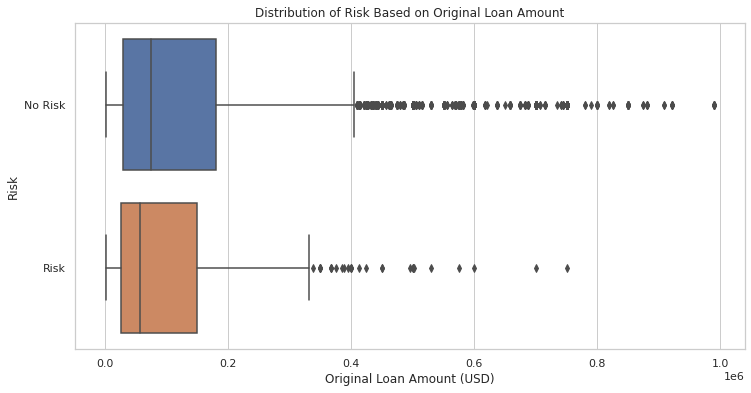

In [67]:
fig = plt.figure(figsize=(12,6))
sb.boxplot(x='Original Loan Amount', y='Risk', data=df_amount1)
plt.title('Distribution of Risk Based on Original Loan Amount')
plt.ylabel('Risk')
plt.xlabel('Original Loan Amount (USD)')
plt.show()

- The Risk affected negatively by the Original Loan Amount.

### Does the Risk Status Affected by the Interest Rate?

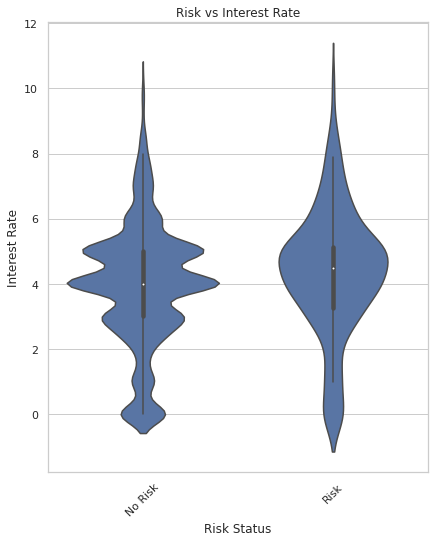

In [40]:
plt.figure(figsize=[15, 8.27]);
colorChoice = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.violinplot(data = df, x = 'Risk', y = 'Interest Rate', color=colorChoice);
plt.title('Risk vs Interest Rate');
plt.ylabel('Interest Rate');
plt.xlabel('Risk Status');
plt.xticks(rotation=45);

- We can notice that the Risk Status slightly affected by the Interest Rate.

### Does the Risk Status Affected by the Loan Length?

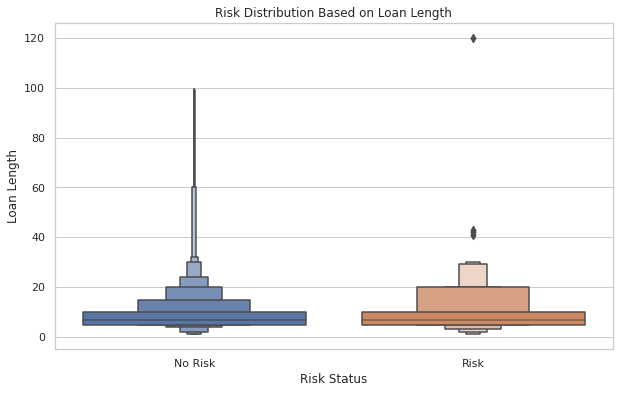

In [41]:
fig = plt.figure(figsize=(10,6))
sb.boxenplot(y='Loan Length', x='Risk', data=df)
plt.title('Risk Distribution Based on Loan Length')
plt.xlabel('Risk Status')
plt.ylabel('Loan Length')
plt.show()

- The Risk Status Affected Negatively by the Loan Length.
- The Higher Loan Length leads to less Risk.

### Does the Risk Status Affected by the Jobs Created?

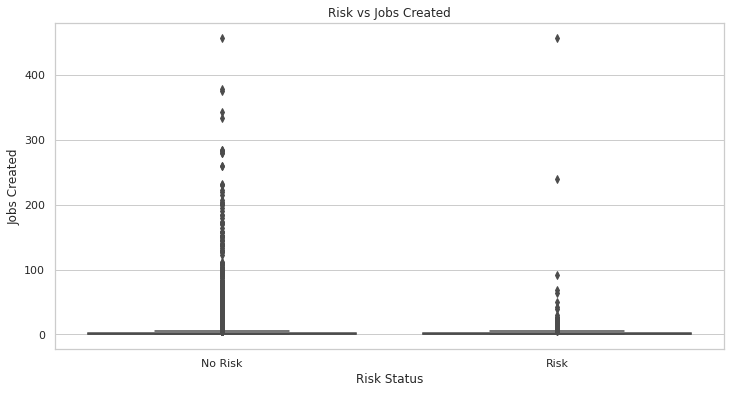

In [44]:
fig = plt.figure(figsize=(12,6))
sb.boxplot(x='Risk', y='Jobs Created', data=df)
plt.title('Risk vs Jobs Created')
plt.ylabel('Jobs Created')
plt.xlabel('Risk Status')
plt.show()

- The higher of Jobs Created by the Borrower, the low Risk.

# 

# Multivariate Exploration

- In this section, I'll Create plots of three variables to investigate my data even further.


### Does the Risk Affected By The Original Loan Amount or Interest Rate?

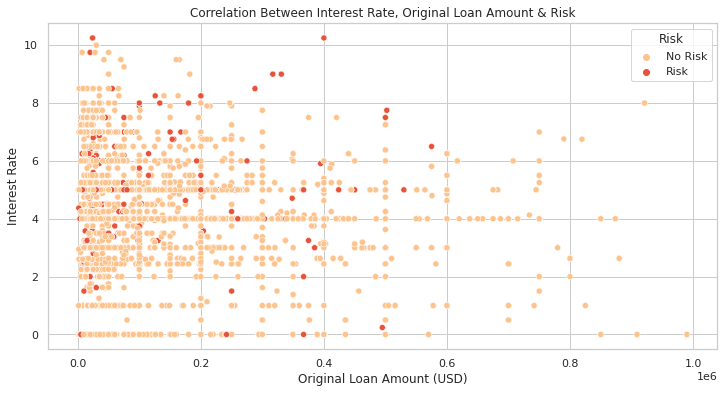

In [47]:
# After removing the oulier values of the Original Loan Amount
fig = plt.figure(figsize=(12,6))
sb.scatterplot(x='Original Loan Amount', y='Interest Rate', data=df_amount1, hue='Risk', palette='OrRd')
plt.title('Correlation Between Interest Rate, Original Loan Amount & Risk')
plt.ylabel('Interest Rate')
plt.xlabel('Original Loan Amount (USD)')
plt.show()

- There is a relationship between Interest Rate and Loan Amount.
- Higher Loan Amount leads to Higher Interest Rate. and also leads to higher risk.

- The last notice from this dataset:
The most Risk (unpaid loans), were in the lower sector of loan amount, and also in the lower loan length.

## Thank you
### Essam Ali